# Project - Toba Toursim
<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">12S4054</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Recommendation System</td>
    </tr>
    <tr>
        <td style="text-align:left">Topik</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>TF-IDF Cosine Similarity (CBF) </i></td>
    </tr>
    <tr>
        <td style="text-align:left">Kelompok</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>10</i></td>
    </tr>
</table>

## Import Libraries and Load Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv('/data/Tempat-Wisata-Toba-Preprocessing.csv')

In [2]:
# Display basic information
print("Dataset Shape:", data.shape)
print("First 5 rows of the dataset:")
print(data.head())

Dataset Shape: (43226, 9)
First 5 rows of the dataset:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                             address  PlaceID  \
0  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
1  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
2  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
3  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
4  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   

          Nama_tempat_wisata       Category    ReviewerId  Rating  \
0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.126030e+20     5.0   
1  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.119090e+20     5.0   
2  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.078860e+20     5.0   
3  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.130720e+20     5.0   
4  PASIR PUTIH LUMBAN 

In [3]:
# Rename columns for consistency
data = data.rename(columns={
    'ReviewerId': 'user_id',
    'PlaceID': 'item_id',
    'Rating': 'rating'
})

## Data Splitting


In [4]:
# Data Splitting
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", validation_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (30258, 9)
Validation Data Shape: (6484, 9)
Testing Data Shape: (6484, 9)


## Create User-Item Matrix

In [5]:
# Create User-Item Matrix
def create_user_item_matrix(data, user_col='user_id', item_col='item_id', rating_col='rating'):
    # Handle duplicate entries by grouping and aggregating (e.g., average ratings)
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    # Create pivot table
    return data.pivot(index=user_col, columns=item_col, values=rating_col).fillna(0)

train_matrix = create_user_item_matrix(train_data)
val_matrix = create_user_item_matrix(validation_data)
test_matrix = create_user_item_matrix(test_data)

print("Train User-Item Matrix Shape:", train_matrix.shape)

Train User-Item Matrix Shape: (13222, 101)


In [6]:
train_matrix

item_id,0,1,2,3,4,5,6,8,9,10,...,92,93,94,95,96,97,98,99,100,101
user_id,,,,,,,,,,,,,,,,,,,,,
1.000010e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000020e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000050e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.184420e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184430e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
1.184440e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [7]:
val_matrix

item_id,0,1,3,4,5,6,8,9,10,11,...,92,93,94,95,96,97,98,99,100,101
user_id,,,,,,,,,,,,,,,,,,,,,
1.000010e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000090e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1.000110e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000140e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.184300e+20,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184350e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184360e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test_matrix

item_id,0,1,3,4,5,6,8,9,10,11,...,92,93,94,95,96,97,98,99,100,101
user_id,,,,,,,,,,,,,,,,,,,,,
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1.000140e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000160e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000170e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000180e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.184360e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184370e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.184390e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

In [9]:
#  Cosine Similarity
item_similarity = cosine_similarity(train_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=train_matrix.columns, columns=train_matrix.columns)

In [10]:
# Align validation and test matrices with the training matrix columns
val_matrix_aligned = val_matrix.reindex(columns=train_matrix.columns, fill_value=0)
test_matrix_aligned = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

# Compute Approximation Matrices
train_approx_matrix = np.dot(train_matrix, item_similarity_df.T)
val_approx_matrix = np.dot(val_matrix_aligned, item_similarity_df.T)
test_approx_matrix = np.dot(test_matrix_aligned, item_similarity_df.T)

# Convert back to DataFrame
train_approx_matrix = pd.DataFrame(train_approx_matrix, index=train_matrix.index, columns=train_matrix.columns)
val_approx_matrix = pd.DataFrame(val_approx_matrix, index=val_matrix.index, columns=train_matrix.columns)
test_approx_matrix = pd.DataFrame(test_approx_matrix, index=test_matrix.index, columns=train_matrix.columns)


## Precision and Recall Calculation

In [11]:
def compute_precision_recall(true_matrix, approx_matrix, threshold=3.0):
    y_true = (true_matrix.values.flatten() > threshold).astype(int)
    y_pred = (approx_matrix.values.flatten() > threshold).astype(int)
    true_positives = np.sum(y_true * y_pred)
    precision = true_positives / np.sum(y_pred) if np.sum(y_pred) > 0 else 0
    recall = true_positives / np.sum(y_true) if np.sum(y_true) > 0 else 0
    return precision, recall

## MAP Calculation

In [12]:
def compute_map(true_matrix, approx_matrix, top_n=5):
    map_score = 0
    num_users = true_matrix.shape[0]

    for user_id in range(num_users):
        # Get true and predicted ratings for the user
        y_true = true_matrix.iloc[user_id].values
        y_pred = approx_matrix.iloc[user_id].values

        # Get top-n items, ensuring indices do not exceed bounds
        top_items = np.argsort(y_pred)[-top_n:]
        top_items = np.clip(top_items, 0, len(y_true) - 1)  # Ensure valid indices

        # Calculate relevance
        relevant_items = y_true[top_items] > 0
        if np.sum(relevant_items) > 0:
            map_score += np.mean(relevant_items)

    return map_score / num_users if num_users > 0 else 0


In [13]:
# Hitung MAP untuk Validation dan Test
val_map = compute_map(val_matrix, val_approx_matrix, top_n=5)
test_map = compute_map(test_matrix, test_approx_matrix, top_n=5)

# Cetak hasil
print(f"Validation MAP: {val_map:.4f}")
print(f"Test MAP: {test_map:.4f}")


Validation MAP: 0.0460
Test MAP: 0.0467


In [14]:
# Predicted Matrices for Evaluation
train_approx_matrix = pd.DataFrame(item_similarity.dot(train_matrix.T).T, index=train_matrix.index, columns=train_matrix.columns)
val_approx_matrix = pd.DataFrame(item_similarity.dot(train_matrix.T).T, index=train_matrix.index, columns=train_matrix.columns).reindex(index=val_matrix.index, columns=val_matrix.columns, fill_value=0)
test_approx_matrix = pd.DataFrame(item_similarity.dot(train_matrix.T).T, index=train_matrix.index, columns=train_matrix.columns).reindex(index=test_matrix.index, columns=test_matrix.columns, fill_value=0)

In [15]:
# Compute Precision, Recall, and MAP for Validation and Test Sets
val_precision, val_recall = compute_precision_recall(val_matrix, val_approx_matrix)
test_precision, test_recall = compute_precision_recall(test_matrix, test_approx_matrix)
val_map = compute_map(val_matrix, val_approx_matrix)
test_map = compute_map(test_matrix, test_approx_matrix)

In [16]:
# Print Evaluation Metrics
print(f"Validation Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, MAP: {val_map:.4f}")
print(f"Test Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, MAP: {test_map:.4f}")

Validation Precision: 0.0205, Recall: 0.0391, MAP: 0.0388
Test Precision: 0.0249, Recall: 0.0480, MAP: 0.0376


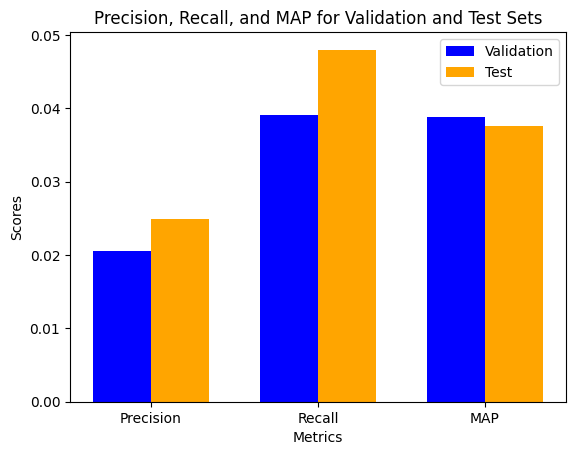

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for visualization
metrics = ['Precision', 'Recall', 'MAP']
validation_scores = [0.0205, 0.0391, 0.0388]
test_scores = [0.0249, 0.0480, 0.0376]

# Bar width
bar_width = 0.35

# Position of bars
x = np.arange(len(metrics))

# Create bar plot
plt.bar(x - bar_width/2, validation_scores, bar_width, label='Validation', color='blue')
plt.bar(x + bar_width/2, test_scores, bar_width, label='Test', color='orange')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Precision, Recall, and MAP for Validation and Test Sets')
plt.xticks(x, metrics)
plt.legend()

# Display the plot
plt.show()


# Validation and Test: Precision, Recall, and MAP for Top-5 and Top-10

In [32]:
# Precision and Recall for Top-K
def compute_precision_recall_at_k(true_matrix, approx_matrix, k=5, threshold=3.0):
    precision_list = []
    recall_list = []
    num_users = true_matrix.shape[0]

    for user_id in range(num_users):
        # Get true and predicted ratings for the user
        y_true = true_matrix.iloc[user_id].values
        y_pred = approx_matrix.iloc[user_id].values

        # Get top-k items, handling cases where k > len(y_pred)
        sorted_indices = np.argsort(y_pred)[::-1]  # Sort in descending order
        top_k_items = sorted_indices[:min(k, len(y_pred))]

        # Clip indices to ensure they do not exceed bounds of y_true
        top_k_items = np.clip(top_k_items, 0, len(y_true) - 1)

        # Calculate relevance
        relevant_items = (y_true > threshold).astype(int)
        recommended_relevant = relevant_items[top_k_items]

        # Calculate precision and recall
        precision = np.sum(recommended_relevant) / len(top_k_items) if len(top_k_items) > 0 else 0
        recall = np.sum(recommended_relevant) / np.sum(relevant_items) if np.sum(relevant_items) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    return np.mean(precision_list), np.mean(recall_list)

# Mean Average Precision (MAP) for Top-K
def compute_map_at_k(true_matrix, approx_matrix, k=5):
    map_score = 0
    num_users = true_matrix.shape[0]

    for user_id in range(num_users):
        # Get true and predicted ratings for the user
        y_true = true_matrix.iloc[user_id].values
        y_pred = approx_matrix.iloc[user_id].values

        # Get top-k items, handling cases where k > len(y_pred)
        sorted_indices = np.argsort(y_pred)[::-1]  # Sort in descending order
        top_k_items = sorted_indices[:min(k, len(y_pred))]

        # Clip indices to ensure they do not exceed bounds of y_true
        top_k_items = np.clip(top_k_items, 0, len(y_true) - 1)

        # Calculate precision at each rank
        relevant_items = (y_true[top_k_items] > 0).astype(int)
        precisions = [
            np.sum(relevant_items[:i+1]) / (i+1)
            for i in range(len(relevant_items)) if relevant_items[i] > 0
        ]

        if len(precisions) > 0:
            map_score += np.mean(precisions)

    return map_score / num_users

# Precision, Recall, and MAP for Validation and Test
# Top-5
val_precision_5, val_recall_5 = compute_precision_recall_at_k(val_matrix, val_approx_matrix, k=5)
test_precision_5, test_recall_5 = compute_precision_recall_at_k(test_matrix, test_approx_matrix, k=5)

val_map_5 = compute_map_at_k(val_matrix, val_approx_matrix, k=5)
test_map_5 = compute_map_at_k(test_matrix, test_approx_matrix, k=5)

# Top-10
val_precision_10, val_recall_10 = compute_precision_recall_at_k(val_matrix, val_approx_matrix, k=10)
test_precision_10, test_recall_10 = compute_precision_recall_at_k(test_matrix, test_approx_matrix, k=10)

val_map_10 = compute_map_at_k(val_matrix, val_approx_matrix, k=10)
test_map_10 = compute_map_at_k(test_matrix, test_approx_matrix, k=10)

# Output Metrics for Top-5
print("\nMetrics for Top-5:")
print(f"Validation Precision@5: {val_precision_5:.4f}, Recall@5: {val_recall_5:.4f}, MAP@5: {val_map_5:.4f}")
print(f"Test Precision@5: {test_precision_5:.4f}, Recall@5: {test_recall_5:.4f}, MAP@5: {test_map_5:.4f}")

# Output Metrics for Top-10
print("\nMetrics for Top-10:")
print(f"Validation Precision@10: {val_precision_10:.4f}, Recall@10: {val_recall_10:.4f}, MAP@10: {val_map_10:.4f}")
print(f"Test Precision@10: {test_precision_10:.4f}, Recall@10: {test_recall_10:.4f}, MAP@10: {test_map_10:.4f}")



Metrics for Top-5:
Validation Precision@5: 0.0347, Recall@5: 0.1419, MAP@5: 0.0785
Test Precision@5: 0.0334, Recall@5: 0.1376, MAP@5: 0.0824

Metrics for Top-10:
Validation Precision@10: 0.0337, Recall@10: 0.2716, MAP@10: 0.0985
Test Precision@10: 0.0330, Recall@10: 0.2672, MAP@10: 0.1029


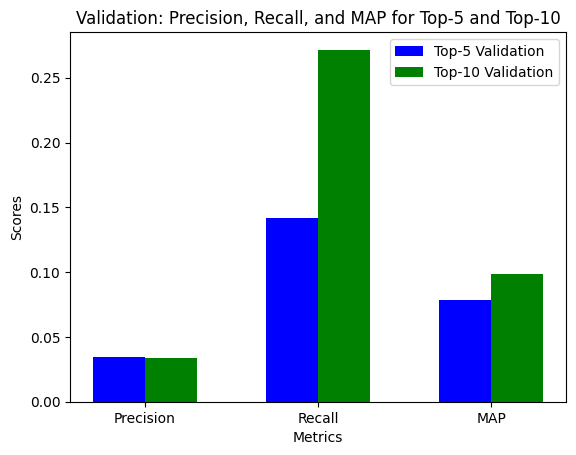

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Validation (Top-5 and Top-10)
metrics = ['Precision', 'Recall', 'MAP']
top_5_validation = [val_precision_5, val_recall_5, val_map_5]
top_10_validation = [val_precision_10, val_recall_10, val_map_10]

# Bar width and positions
bar_width = 0.3
x = np.arange(len(metrics))

# Plot bars for Validation
plt.bar(x - bar_width/2, top_5_validation, bar_width, label='Top-5 Validation', color='blue')
plt.bar(x + bar_width/2, top_10_validation, bar_width, label='Top-10 Validation', color='green')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Validation: Precision, Recall, and MAP for Top-5 and Top-10')
plt.xticks(x, metrics)
plt.legend()

# Display the plot
plt.show()


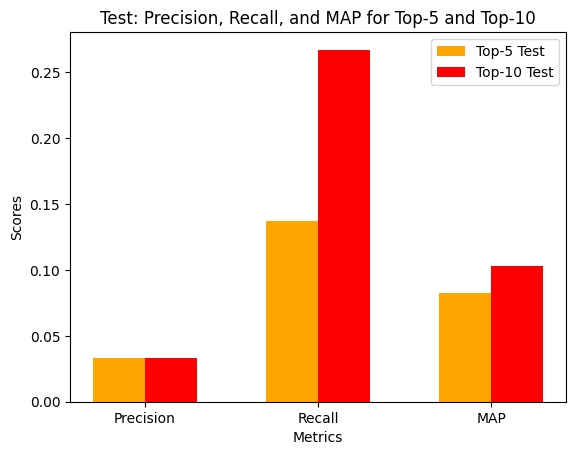

In [35]:
# Metrics for Test (Top-5 and Top-10)
top_5_test = [test_precision_5, test_recall_5, test_map_5]
top_10_test = [test_precision_10, test_recall_10, test_map_10]

# Plot bars for Test
plt.bar(x - bar_width/2, top_5_test, bar_width, label='Top-5 Test', color='orange')
plt.bar(x + bar_width/2, top_10_test, bar_width, label='Top-10 Test', color='red')

# Add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Test: Precision, Recall, and MAP for Top-5 and Top-10')
plt.xticks(x, metrics)
plt.legend()

# Display the plot
plt.show()


## RMSE Calculation Function

In [20]:
print(f"Shape of train_matrix: {train_matrix.shape}")
print(f"Shape of val_matrix: {val_matrix.shape}")
print(f"Shape of test_matrix: {test_matrix.shape}")
print(f"Shape of item_similarity: {item_similarity.shape}")


Shape of train_matrix: (13222, 101)
Shape of val_matrix: (5161, 97)
Shape of test_matrix: (5121, 97)
Shape of item_similarity: (101, 101)


In [21]:
if item_similarity.shape[0] != train_matrix.shape[1]:
    item_similarity = item_similarity[:train_matrix.shape[1], :train_matrix.shape[1]]


In [22]:
val_matrix = np.nan_to_num(val_matrix, nan=0)
train_matrix = np.nan_to_num(train_matrix, nan=0)
test_matrix = np.nan_to_num(test_matrix, nan=0)


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def compute_rmse(true_matrix, similarity_matrix, user_item_matrix):
    """
    Function to calculate RMSE with debugging.
    """
    # Ensure similarity_matrix does not contain NaN or Inf
    similarity_matrix = np.nan_to_num(similarity_matrix, nan=0, posinf=0, neginf=0)

    # Predict the approximate matrix using similarity matrix
    approx_matrix = user_item_matrix.dot(similarity_matrix)

    # Convert approx_matrix to DataFrame with the same index and columns as true_matrix
    approx_matrix = pd.DataFrame(approx_matrix, index=true_matrix.index, columns=true_matrix.columns)

    # Ensure dimensions match
    approx_matrix = approx_matrix.reindex(index=true_matrix.index, columns=true_matrix.columns, fill_value=0)

    # Flatten and compute RMSE
    return np.sqrt(mean_squared_error(true_matrix.values.flatten(), approx_matrix.values.flatten()))

# Convert all matrices to DataFrames if they are not already
if not isinstance(train_matrix, pd.DataFrame):
    train_matrix = pd.DataFrame(train_matrix)

if not isinstance(val_matrix, pd.DataFrame):
    val_matrix = pd.DataFrame(val_matrix)

if not isinstance(test_matrix, pd.DataFrame):
    test_matrix = pd.DataFrame(test_matrix)

# Debugging: Check matrix shapes
print(f"Shape of train_matrix: {train_matrix.shape}")
print(f"Shape of val_matrix: {val_matrix.shape}")
print(f"Shape of test_matrix: {test_matrix.shape}")
print(f"Shape of item_similarity: {item_similarity.shape}")

# Adjust item_similarity if needed
if item_similarity.shape[0] != train_matrix.shape[1]:
    item_similarity = item_similarity[:train_matrix.shape[1], :train_matrix.shape[1]]

# Calculate RMSE for train, validation, and test
train_rmse = compute_rmse(train_matrix, item_similarity, train_matrix)
val_rmse = compute_rmse(val_matrix, item_similarity, train_matrix)
test_rmse = compute_rmse(test_matrix, item_similarity, train_matrix)

# Print results
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")


Shape of train_matrix: (13222, 101)
Shape of val_matrix: (5161, 97)
Shape of test_matrix: (5121, 97)
Shape of item_similarity: (101, 101)
Training RMSE: 0.4187
Validation RMSE: 0.9429
Testing RMSE: 0.9418


In [24]:
# Hitung RMSE untuk train, validation, dan test
train_rmse = compute_rmse(train_matrix, item_similarity, train_matrix)
val_rmse = compute_rmse(val_matrix, item_similarity, train_matrix)
test_rmse = compute_rmse(test_matrix, item_similarity, train_matrix)

# Cetak hasil
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")


Training RMSE: 0.4187
Validation RMSE: 0.9429
Testing RMSE: 0.9418


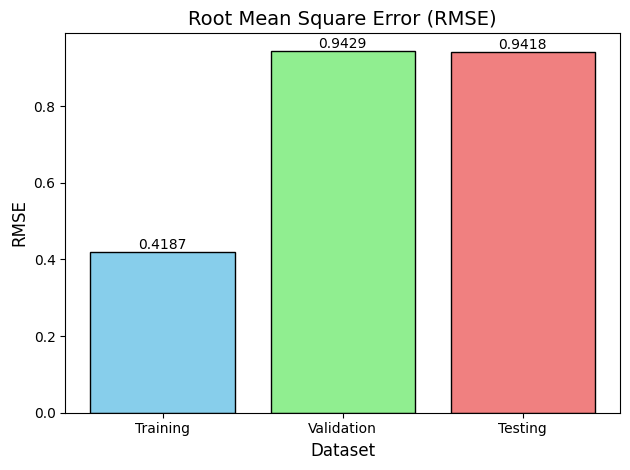

In [39]:
import matplotlib.pyplot as plt

# RMSE values
datasets = ['Training', 'Validation', 'Testing']
rmse_values = [0.4187, 0.9429, 0.9418]

# Plotting the bar chart
plt.bar(datasets, rmse_values, color=['skyblue', 'lightgreen', 'lightcoral'], edgecolor='black')

# Adding text annotations
for i, val in enumerate(rmse_values):
    plt.text(i, val, f'{val:.4f}', ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Root Mean Square Error (RMSE)', fontsize=14)
plt.tight_layout()
plt.show()


## MAE Calculation Function

In [25]:
# Periksa dan tangani nilai NaN di semua matriks
print("Checking for NaN values...")
print(f"NaN in train_matrix: {train_matrix.isnull().sum().sum()}")
print(f"NaN in val_matrix: {val_matrix.isnull().sum().sum()}")
print(f"NaN in test_matrix: {test_matrix.isnull().sum().sum()}")

# Isi nilai NaN dengan 0
train_matrix = train_matrix.fillna(0)
val_matrix = val_matrix.fillna(0)
test_matrix = test_matrix.fillna(0)

# Tangani NaN pada matriks item_similarity
item_similarity = np.nan_to_num(item_similarity)

# Validasi setelah mengisi nilai NaN
print("Post-processing NaN check...")
print(f"NaN in train_matrix: {train_matrix.isnull().sum().sum()}")
print(f"NaN in val_matrix: {val_matrix.isnull().sum().sum()}")
print(f"NaN in test_matrix: {test_matrix.isnull().sum().sum()}")


Checking for NaN values...
NaN in train_matrix: 0
NaN in val_matrix: 0
NaN in test_matrix: 0
Post-processing NaN check...
NaN in train_matrix: 0
NaN in val_matrix: 0
NaN in test_matrix: 0


In [26]:
from sklearn.metrics import mean_absolute_error
import pandas as pd

def compute_mae(true_matrix, similarity_matrix, user_item_matrix):
    # Predict the approximate matrix using similarity matrix
    approx_matrix = user_item_matrix.dot(similarity_matrix)

    # Pastikan dimensi sesuai
    approx_matrix = pd.DataFrame(approx_matrix, index=true_matrix.index, columns=true_matrix.columns)
    approx_matrix = approx_matrix.reindex(index=true_matrix.index, columns=true_matrix.columns, fill_value=0)

    # Hitung MAE setelah memastikan tidak ada NaN
    return mean_absolute_error(true_matrix.values.flatten(), approx_matrix.values.flatten())


In [27]:
# Hitung MAE untuk pelatihan, validasi, dan pengujian
train_mae = compute_mae(train_matrix, item_similarity, train_matrix)
val_mae = compute_mae(val_matrix, item_similarity, train_matrix)
test_mae = compute_mae(test_matrix, item_similarity, train_matrix)

# Cetak hasil
print(f"Training MAE: {train_mae:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")


Training MAE: 0.2817
Validation MAE: 0.4040
Testing MAE: 0.4034


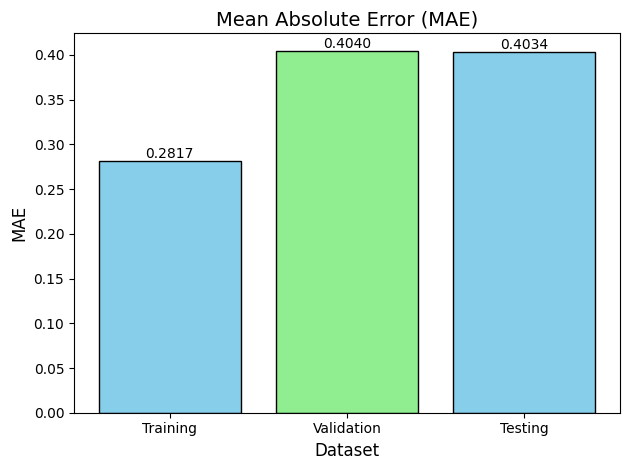

In [38]:
import matplotlib.pyplot as plt

# Values for MAE
datasets = ['Training', 'Validation', 'Testing']
mae_values = [0.2817, 0.4040, 0.4034]

# Plotting the bar chart
plt.bar(datasets, mae_values, color=['skyblue', 'lightgreen', 'skyblue'], edgecolor='black')

# Adding text annotations
for i, val in enumerate(mae_values):
    plt.text(i, val, f'{val:.4f}', ha='center', va='bottom', fontsize=10)

# Labels and title
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Mean Absolute Error (MAE)', fontsize=14)
plt.tight_layout()
plt.show()


# Visualize RMSE and MAE Results

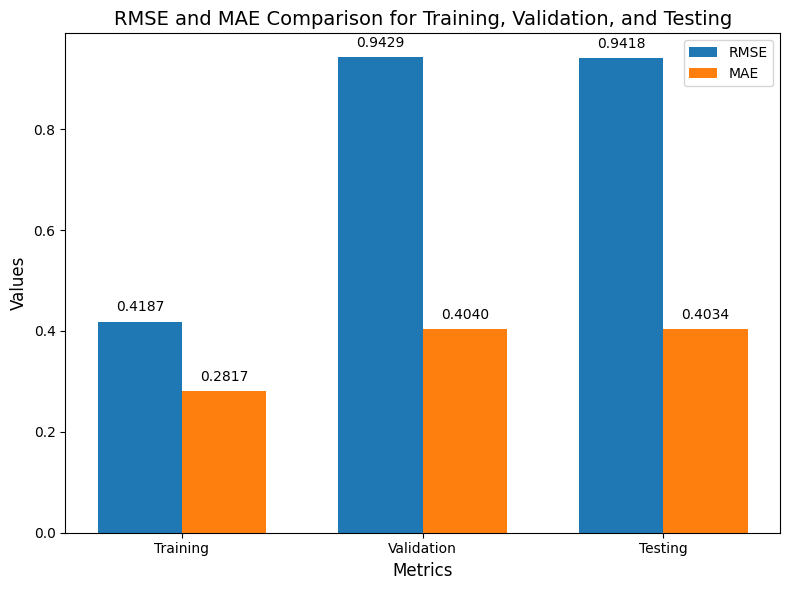

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE and MAE values from the user's data
metrics = ["Training", "Validation", "Testing"]
rmse_values = [0.4187, 0.9429, 0.9418]
mae_values = [0.2817, 0.4040, 0.4034]

# Bar width
bar_width = 0.35
x = np.arange(len(metrics))

# Plotting RMSE and MAE values
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - bar_width / 2, rmse_values, bar_width, label="RMSE")
bars2 = ax.bar(x + bar_width / 2, mae_values, bar_width, label="MAE")

# Adding text annotations for each bar
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}", ha='center', fontsize=10)

# Labels, title, and legend
ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Values", fontsize=12)
ax.set_title("RMSE and MAE Comparison for Training, Validation, and Testing", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


# Top-10 tempat wisata rekomendasi

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load dataset
data = pd.read_csv('/data/Tempat-Wisata-Toba-Preprocessing.csv').rename(columns={
    'PlaceID': 'place_id',
    'Nama_tempat_wisata': 'place_name',
    'Category': 'category',
    'ReviewerId': 'user_id',
    'Rating': 'rating',
    'Address': 'address'
})

# Perbaiki alamat
data['address'] = data['address'].str.replace('Sulawesi Utara', 'Sumatera Utara', regex=False)

# Gabungkan kategori dan alamat untuk meningkatkan variasi
data['features'] = data['category'].fillna('') + " " + data['address'].fillna('')

# Encode features using TF-IDF
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(data['features'])

# Function to calculate recommendations
def get_similarity(user_id, tfidf_matrix, data, top_n=10):
    visited_places = data[data['user_id'] == user_id]['place_id'].tolist()
    not_visited_places = data[~data['place_id'].isin(visited_places)]['place_id'].tolist()

    place_to_idx = {place_id: idx for idx, place_id in enumerate(data['place_id'])}
    idx_to_place = {idx: place_id for place_id, idx in place_to_idx.items()}

    visited_indices = [place_to_idx[place] for place in visited_places]
    not_visited_indices = [place_to_idx[place] for place in not_visited_places]

    similarity_matrix = cosine_similarity(tfidf_matrix[not_visited_indices], tfidf_matrix[visited_indices])

    avg_similarity = similarity_matrix.mean(axis=1)

    # Normalisasi similarity
    normalized_similarity = (avg_similarity - avg_similarity.min()) / (avg_similarity.max() - avg_similarity.min())

    # Tambahkan noise jika variasi terlalu kecil
    if normalized_similarity.std() < 0.01:
        normalized_similarity += np.random.uniform(0, 0.05, size=len(normalized_similarity))

    recommendations = pd.DataFrame({
        'place_id': [idx_to_place[not_visited_indices[i]] for i in range(len(not_visited_indices))],
        'similarity': normalized_similarity
    }).sort_values(by='similarity', ascending=False).drop_duplicates(subset='place_id').head(top_n)

    recommended_places = pd.DataFrame([{
        'Nama_tempat_wisata': data[data['place_id'] == rec['place_id']]['place_name'].values[0],
        'address': data[data['place_id'] == rec['place_id']]['address'].values[0],
        'Rating': rec['similarity']
    } for _, rec in recommendations.iterrows()])

    return recommended_places

# Get a random user
user_id = data['user_id'].sample(1).iloc[0]

# Get Top-5 and Top-10 recommendations
top_5_recommendations = get_similarity(user_id, tfidf_matrix, data, top_n=5)
top_10_recommendations = get_similarity(user_id, tfidf_matrix, data, top_n=10)

# Display recommendations
print(f"Top 5 recommendations for user {user_id}:\n")
print(top_5_recommendations.to_string(index=False))

print(f"\nTop 10 recommendations for user {user_id}:\n")
print(top_10_recommendations.to_string(index=False))


Top 5 recommendations for user 1.06044e+20:

                             Nama_tempat_wisata                                                                                                                                 address   Rating
                            Menara Pandang Tele                                               HJ2Q+RWQ, Turpuk Limbong, Kec. Harian, Kabupaten Samosir, Sumatera Utara 22396, Indonesia 1.000000
                              Air Terjun Efrata                                                  GJPV+QX4, Sosor Dolok, Kec. Harian, Kabupaten Samosir, Sumatera Utara 22396, Indonesia 0.923436
Patung Yesus, Bukit Sibea-bea, Huta Harian Boho                                        HM2F+9QH, Turpuk Sihotang, Boho, Kec. Harian, Kabupaten Samosir, Sumatera Utara 22396, Indonesia 0.715950
                                  Bukit Holbung                                                         GPM5+WRP, Dolok Raja, Kec. Harian, Kabupaten Samosir, Sumatera Utara, Indonesia